# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [60]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
traffic = pd.read_csv('Traffic Data.csv', index_col= 'date_time', parse_dates= True )
traffic.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [127]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [128]:
traffic.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

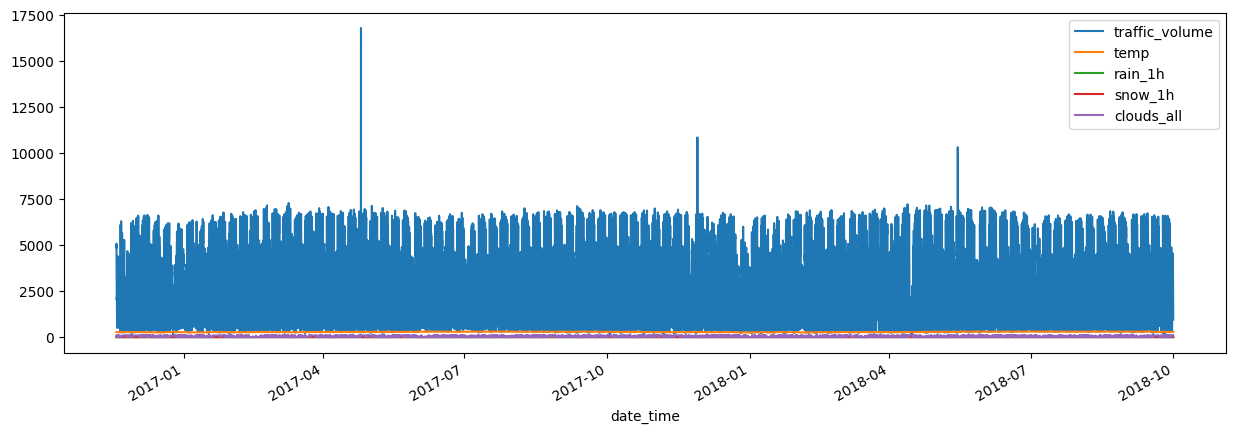

In [129]:
# plot the time series data

traffic.plot(figsize= (15, 5))
plt.show()

In [130]:
#handle missing values in traffic volume

traffic.fillna(traffic['traffic_volume'].mode(), inplace= True)

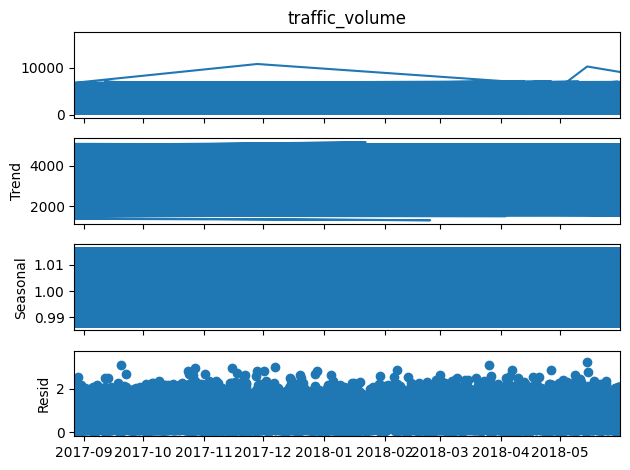

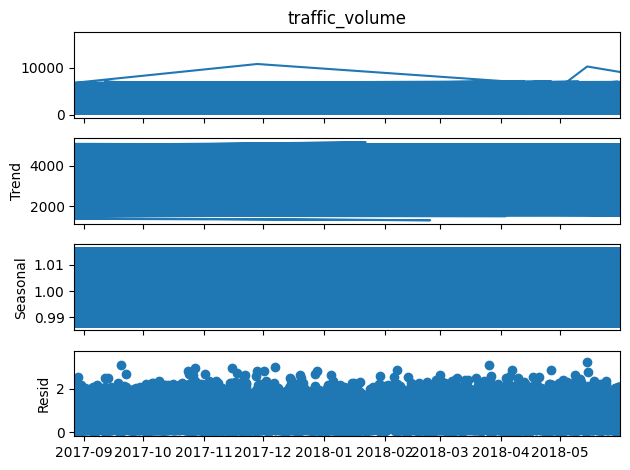

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose

ets = seasonal_decompose(traffic['traffic_volume'], model= 'multiplicative', period=12)
ets.plot()

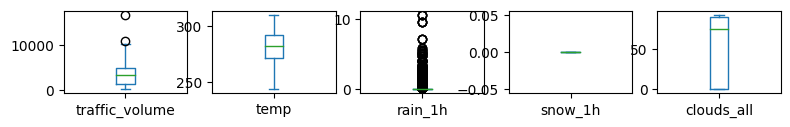

In [135]:
traffic.plot(kind='box', subplots=True, layout=(8,8), figsize=(15, 10))
plt.show()

In [136]:
# handling outlires

def handle_outlier(data, column):
        Q1=data[column].quantile(0.25)
        Q3= data[column].quantile(0.75)
        IQR= Q3- Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q1 + 1.5 * IQR
        return data[(data[column] >= lower_bound ) & (data[column] <= upper_bound)]


#apply it on the dataset columns
traffic = handle_outlier(traffic, 'traffic_volume')
traffic = handle_outlier(traffic, 'rain_1h')

In [139]:
traffic.drop([ 'rain_1h'], axis=1, inplace=True)

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [132]:
traffic.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [133]:
#handle missing values

traffic.fillna(traffic['traffic_volume'].mean(), inplace= True)

In [137]:
traffic.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [138]:
# sort index
traffic.sort_index(inplace= True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [140]:
# shift method

traffic['prev_traffic_volume'] = traffic['traffic_volume'].shift(1)

In [141]:
# diff method

traffic['prev_traffic_volume'] = traffic['traffic_volume'].diff()

In [142]:
# Extract date-based features

traffic['Day of the week'] = traffic.index.day_name()
traffic['Month'] = traffic.index.month
traffic['Day of the year'] =traffic.index.day_of_year


In [143]:
traffic.columns

Index(['traffic_volume', 'temp', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'prev_traffic_volume', 'Day of the week',
       'Month', 'Day of the year'],
      dtype='object')

In [144]:
traffic.drop(['temp', 'snow_1h', 'prev_traffic_volume', 'Day of the week',
       'Month', 'Day of the year', 'weather_description', 'weather_main', 'clouds_all' ], axis=1, inplace=True)

In [145]:
traffic.columns

Index(['traffic_volume'], dtype='object')

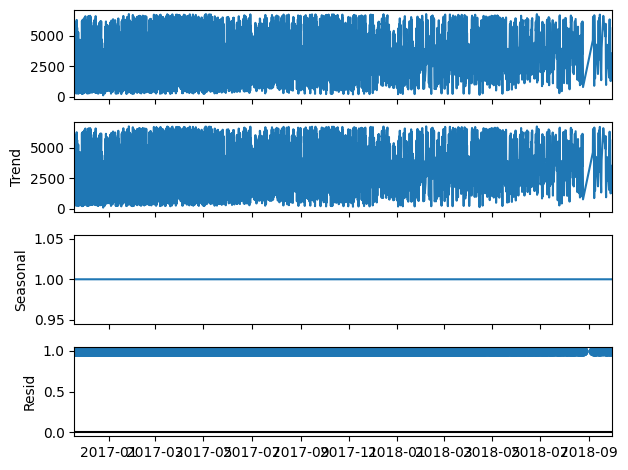

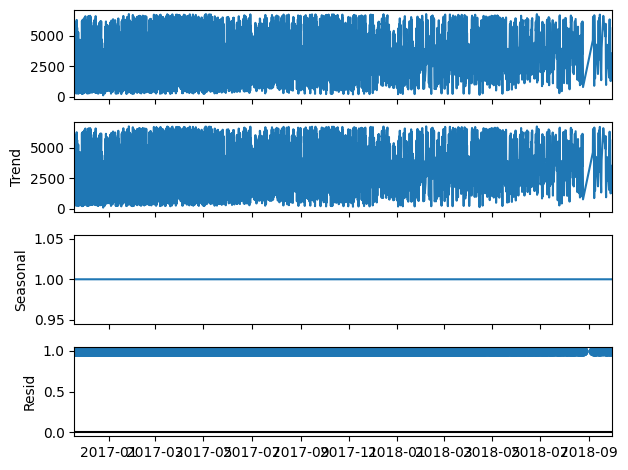

In [203]:


ets = seasonal_decompose(traffic, model= 'multiplicative', period=1)
ets.plot()

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [146]:
traffic.head()

,traffic_volume
date_time,
2016-11-18 15:00:00,4872.0
2016-11-18 15:00:00,4872.0
2016-11-18 15:00:00,4872.0
2016-11-18 16:00:00,5074.0
2016-11-18 16:00:00,5074.0


In [147]:
traffic.tail()

,traffic_volume
date_time,
2018-09-30 19:00:00,3543.0
2018-09-30 20:00:00,2781.0
2018-09-30 21:00:00,2159.0
2018-09-30 22:00:00,1450.0
2018-09-30 23:00:00,954.0


In [148]:
# divid the time intervals

# start from: nov 11 2016 15:00:00 - sep 30  2018 23:00:00



train= traffic.loc['2016-11-18 15:00:00':'2018-03-20 23:00:00'] # 70% approx
val=traffic.loc['2018-3-21 00:00:00':'2018-06-18 23:00:00'] # 15%
test= traffic.loc['2018-06-19 00:00:00':'2018-09-30 23:00:00'] # 15%

In [149]:
traffic.drop_duplicates(inplace= True)

In [150]:
# split train into trainX and trainY
from tensorflow.keras.utils import timeseries_dataset_from_array

window_size = 2 # take 2 days to predict the third day traffic volum

train_Xy = timeseries_dataset_from_array(train, targets= train[window_size:], sequence_length= window_size)
val_Xy =timeseries_dataset_from_array(val, targets= val[window_size:], sequence_length= window_size)
test_Xy =timeseries_dataset_from_array(test, targets= test[window_size:], sequence_length= window_size)


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [151]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
train_scaled = scale.fit_transform(train)
val_scaled = scale.transform(val)
test_scaled = scale.transform(test)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [152]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.optimizers import Adam

In [153]:
tf.random.set_seed(42)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [206]:
# first model will be simple RNN

RNN_model = Sequential([
                    SimpleRNN(100,activation= 'tanh' ,return_sequences= True ),
                    SimpleRNN(50, activation= 'tanh',return_sequences= True ),
                    SimpleRNN(25, activation= 'tanh',return_sequences= False),
                    Dense(8, activation= 'relu')
])

RNN_model.compile(optimizer= 'adam', loss= 'mse')

In [208]:
RNN_history = RNN_model.fit(train_Xy, validation_data= val_Xy, epochs=50)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 13484865.0000 - val_loss: 14161319.0000
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 13466680.0000 - val_loss: 14142810.0000
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 13448558.0000 - val_loss: 14124349.0000
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 13430475.0000 - val_loss: 14105922.0000
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 13412428.0000 - val_loss: 14087529.0000
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 13394412.0000 - val_loss: 14069167.0000
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 13376430.0000 - val_loss: 14050838.0000
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 13358477.0000 - val_loss: 14032535.0000
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 13340550.0000 - val_loss: 14014257.0000
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 13322651.0000 - val_loss: 139

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [209]:
rnn_predict = RNN_model.predict(test_Xy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [210]:
RNN_eva = RNN_model.evaluate(test_Xy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 13733657.0000


In [211]:
# extract batchs of data for trainin

X_train, y_train = next(iter(train_Xy.take(1)))

X_val, y_val =  next(iter(val_Xy.take(1)))
X_test, y_test =  next(iter(test_Xy.take(1)))

In [213]:
# Calculate evaluation metric
from sklearn.metrics import mean_absolute_error, mean_squared_error

# reshape rnn_predict based on y_test
predic = y_test.shape[0]
rnn_predict = rnn_predict[:,0]

rnn_predict = rnn_predict.reshape(y_test.shape)

mae = mean_absolute_error(y_test, rnn_predict)
print(mae)

3619.637893676758


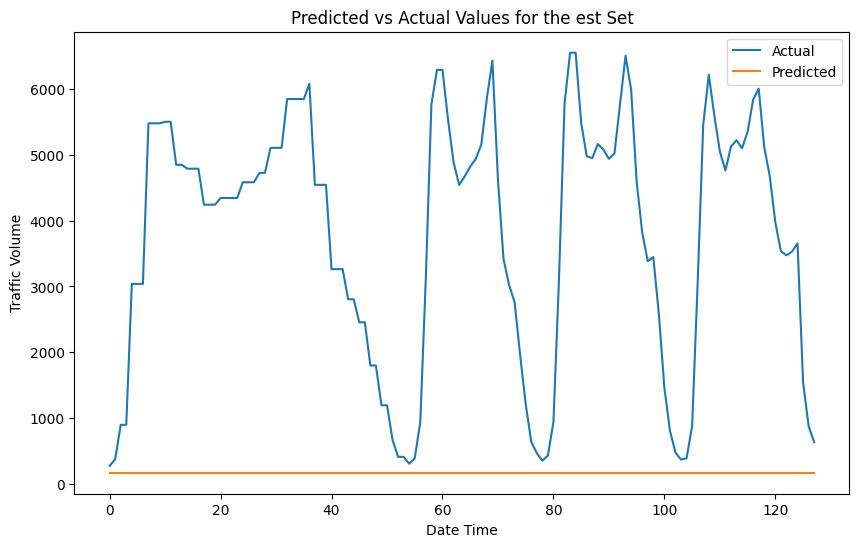

In [214]:
# Plot predicted vs actual values

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(rnn_predict, label='Predicted')
plt.title('Predicted vs Actual Values for the est Set')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

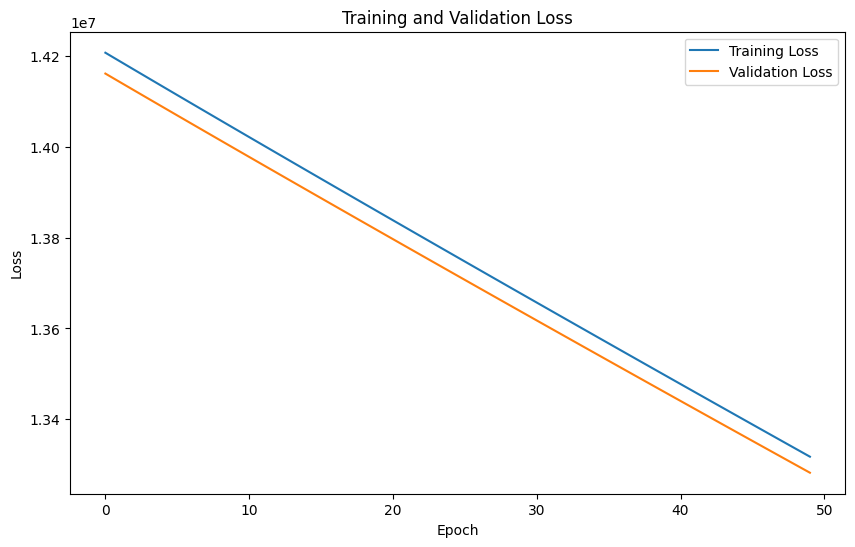

In [215]:
# plot the loss and val loss

plt.figure(figsize=(10, 6))
plt.plot(RNN_history.history['loss'], label='Training Loss')
plt.plot(RNN_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [216]:
# second model is GRU



GRU_model = Sequential([
               GRU(units=50, return_sequences= True),
               GRU(units= 50, return_sequences= False), # second layer of gru must be false
               Dense(units= 25, activation= 'relu'),
               Dense(units= 1, activation= 'relu')
])

GRU_model.compile(optimizer= 'adam', loss = 'mean_squared_error')



In [217]:
GRU_history = GRU_model.fit(train_Xy, validation_data= val_Xy, epochs= 20)

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - loss: 13620104.0000 - val_loss: 14313151.0000
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 13620104.0000 - val_loss: 14313151.0000
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 13620104.0000 - val_loss: 14313151.0000
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 13620104.0000 - val_loss: 14313151.0000
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 13620104.0000 - val_loss: 14313151.0000
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 13620104.0000 - val_loss: 14313151.0000
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 13620104.0000 - val_loss: 14313151.0000
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 13620104.0000 - val_loss: 14313151.0000
Epoch 9/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 13620104.0000 - val_loss: 14313151.0000
Epoch 10/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 13620104.0000 - val_loss: 14

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [218]:
GRU_pred= GRU_model.predict(test_Xy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [219]:
GRU_eva = GRU_model.evaluate(test_Xy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14807962.0000


In [220]:
# Calculate evaluation metric

# reshape GRU_pred based on y_test
predict = y_test.shape[0]
GRU_pred = GRU_pred[:predict]

GRU_pred = GRU_pred.reshape(y_test.shape)

mae = mean_absolute_error(y_test, GRU_pred)
print(mae)

3783.828125


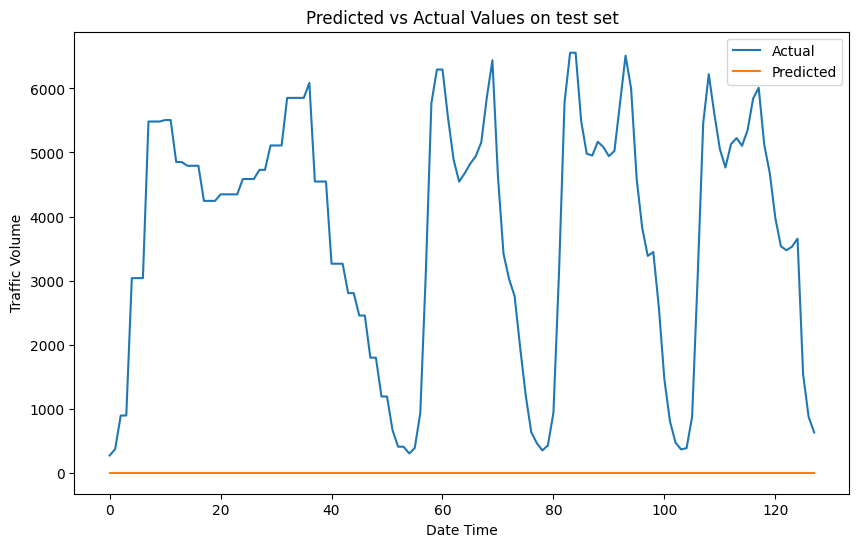

In [221]:
# Plot predicted vs actual values for test set

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(GRU_pred, label='Predicted')
plt.title('Predicted vs Actual Values on test set')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

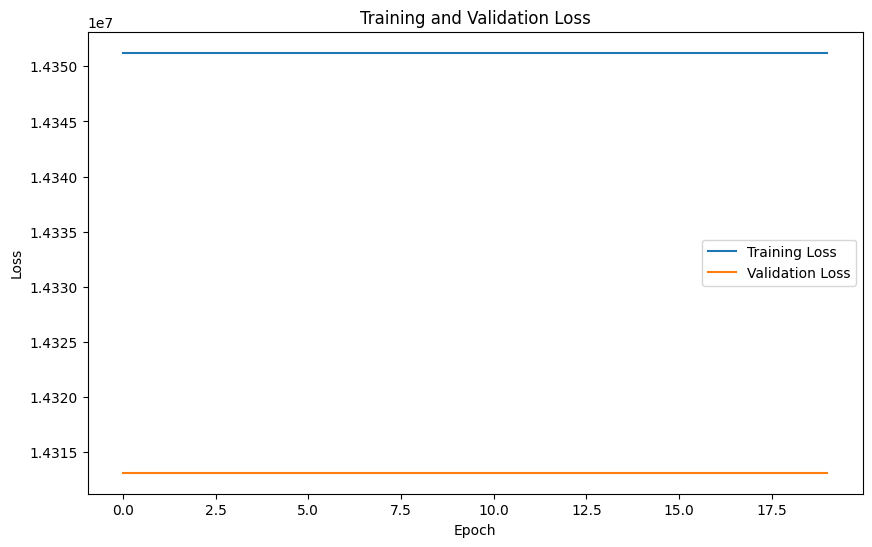

In [222]:
# plot the loss and val loss

plt.figure(figsize=(10, 6))
plt.plot(GRU_history.history['loss'], label='Training Loss')
plt.plot(GRU_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1. I handle missing values in traffic volume so i can represent it in seasonal_decompose


7. there is underfitting \